This notebook analyses the results obtained from the code `getDists_etc.py`, run on all the data (~3.6M compounds).

In [1]:
# Load all modules and functions to use here
from ana_funcs import *

In [2]:
# Load data
dataPath = "../Data/"
hnd = np.load(dataPath+'history_HND.npy')
min_yr,max_yr = 1771,2017

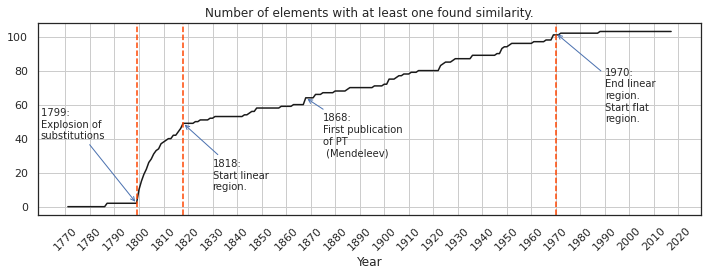

In [3]:
# Plot number of elements appearing in HND table each year
plot_count_elems_w_matches(min_yr,max_yr,hnd)

The interpretation of the numbers on y-axis is as follows: 

`An element Y is counted (for a given year), iff there exists at least one compound RXn, such that X = Y and at least one any other element. That is, if Y is related to any other element by a formula substitution relationship.`

This is an interesting plot, as it shows how relationships between elements, within the chemical space, evolve with time. It is quite interesting to see how compounds were mostly unrelated until 1800, but this year the number of related, or relatable elements, explodes and this explotion lasts until about 1818, where a seemingly constant growth is established.

Some questions arise, the most important being:

- What exactly happened in 1800? 
- Why are the numbers so low before this year?
- How can this linear regime be interpreted/explained?

Take into account that, to 1800, about 32 elements were known to humanity, [as shown here](https://environmentalchemistry.com/yogi/periodic/year.html). How come only 2 elements are related through a substitution relationship?.

### Let's explore the necessary conditions leading to the change we observe around 1800, which may help answer our first and second question.

To be simplistic, let's assume the number of related elements (F) is 0 before 1800, that is F(1799) = 0.
This means that, although some compounds are known, every one of these is a singular compound in terms of replaceability of elements. If we conceive each compound as the set of substitution formulas it gives rise to, then the set of compounds would be a non-overlapping partitioning of the space of substitution formulas, in this particular scenario.

With this in mind, whatever happened in 1800 can be abstracted as an introduction of a new set of compounds, one rich enough to build "bridges" between the aforementioned partitions. For the effects of this discussion, we may define "bridge" as follows.

- A new compound C -abstracted as a set of substitution formulas- is a $\textbf{bridge}$ between two other compounds A and B, if A $\cap$ B = $\varnothing$, while both C $\cap$ A and C $\cap$ B are not null.

This observation sets a $\textit{strict}$ lower bound for the possible generation of the periodic system: `No periodic system could have been created before 1800, even though 32 elements were known to that year.` There is, however, evidence that the PS could have been robustly postulated by the 1840s.

`If true, this would be a really interesting conclusion.` However, there is still the possibility that all of these results are influenced and biased by the way the data were curated, before and after I got my hands on it. 

---

### To answer our third question, let us explore a bit further the linear behaviour of this plot between the pertinent years.

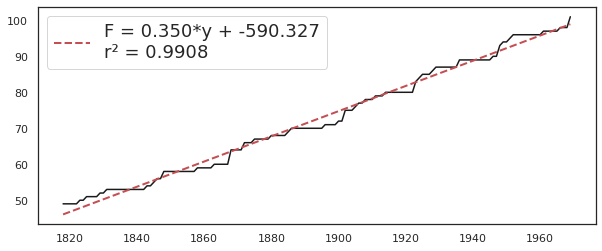

In [4]:
init = 1818
end = 1970

years = np.arange(init,end,1)
elem_count = (~np.isnan(hnd)).sum(axis=(1,2) )[init-1771:end-1771]

# Fit linear model
from scipy.stats import linregress
lm = linregress(years,elem_count) # Linear model
lin_pred = lm.slope*years + lm.intercept

fig, ax = plt.subplots(figsize=(10,4))
# Plot data
sns.lineplot(x=years,y=elem_count,ax=ax,color='k')
# Plot linear model
label = f'F = {lm.slope:.3f}*y + {lm.intercept:.3f}\nr² = {lm.rvalue**2:.4f}'
sns.lineplot(x=years,y=lin_pred,ax=ax,color='r',
             label = label,linestyle='--',linewidth=2)
plt.legend(fontsize=18)
plt.show()

What we really care about here is the slope, which is about 0.35. This means that, very approximately, `about every three years, one element is brought into consideration for the construction of the Periodic System`, and for the results we just got, this has been a constant for nearly 152 years!.

Now, such a linear behaviour stopped after 1970, probably due to the fact that newer elements were produced synthetically and couldn't be produced in sufficient quantities to be able to form compounds, leaving nearly 16 of these elements out of consideration and as a consquence, stopping the linear increase we see.

In [5]:
0.9950**2

0.990025